In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2

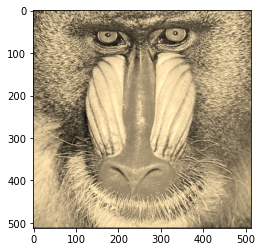

In [2]:
from PIL import Image

def sepia(caminhoImagem):
    imagem = Image.open(caminhoImagem)
    largura, altura = imagem.size

    pixels = imagem.load() # create the pixel map

    for py in range(altura):
        for px in range(largura):
            r, g, b = imagem.getpixel((px, py))

            tr = int(0.393 * r + 0.769 * g + 0.189 * b)
            tg = int(0.349 * r + 0.686 * g + 0.168 * b)
            tb = int(0.272 * r + 0.534 * g + 0.131 * b)

            if tr > 255:
                tr = 255

            if tg > 255:
                tg = 255

            if tb > 255:
                tb = 255

            pixels[px, py] = (tr,tg,tb)

    return imagem

imagem_sepia = sepia('./imagens_coloridas/baboon.png')

plt.imshow(np.asarray(imagem_sepia))

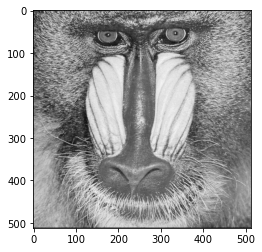

In [3]:
def coloridoParaCinza(caminho_imagem):
    imagem = np.asarray(Image.open(caminho_imagem))
    return np.dot(imagem[...,:3], [0.1440, 0.5870,0.2989 ])

imagem_cinza = coloridoParaCinza('./imagens_coloridas/baboon.png')

plt.imshow(np.asarray(imagem_cinza), cmap = "gray")

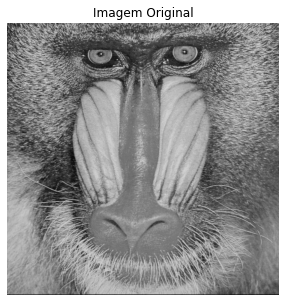

In [4]:
imagem = cv2.imread('baboon.png')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 5))
plt.title('Imagem Original')
plt.axis("off")
plt.imshow(imagem)

In [5]:
def converteImagemMatriz(img_nome):
    img = cv2.imread(img_nome, 0)
    img_formato = img.shape
    img_mat = []
    for i in range(0, img_formato[0]):
        linha = []
        for j in range(0, img_formato[1]):
            pixel = img.item(i, j)
            linha.append(pixel)
        img_mat.append(linha)
    img_mat = np.array(img_mat)
    return img_mat

def subMatrizes(matrizOriginal, tamanhoFiltro):
    width = len(matrizOriginal[0])
    height = len(matrizOriginal)
    if tamanhoFiltro[0] == tamanhoFiltro[1]:
        if tamanhoFiltro[0] > 2:
            matrizOriginal = np.pad(matrizOriginal, tamanhoFiltro[0] - 2, mode='constant')
        else: pass
    else: pass
    
    matriz = []
    for i in range(0, height - tamanhoFiltro[1] + 1):
        for j in range(0, width - tamanhoFiltro[0] + 1):
            matriz.append(
                [
                    [matrizOriginal[col][row] for row in range(j, j + tamanhoFiltro[0])]
                    for col in range(i, i + tamanhoFiltro[1])
                ]
            )
    img = np.array(matriz)
    return img

def aplicacaoFiltro(img, filtro):
    img_filtrada = []
    for linha in img:
        img_filtrada.append(
            np.sum(np.multiply(linha, filtro))
        )
    valor_novo_formato = int(math.sqrt(img.shape[0]))
    img_filtrada = np.array(img_filtrada).reshape(valor_novo_formato, valor_novo_formato)
    return img_filtrada

def plotImagem(imgNome, filtroNome, matrizConvolucao):
    nome, extensao = imgNome.split('.')
    cv2.imwrite(str(nome + '_' + filtroNome + '.' + extensao), matrizConvolucao)
    original = cv2.imread(str(nome + '.' + extensao))
    filtrada = cv2.imread(str(nome + '_' + filtroNome + '.' + extensao))
    
    fig = plt.figure(figsize=(16, 25))
    ax1 = fig.add_subplot(2,2,1)
    ax1.axis("off")
    ax1.title.set_text('Original')
    ax1.imshow(original)
    ax2 = fig.add_subplot(2,2,2)
    ax2.axis("off")
    ax2.title.set_text(str(filtroNome).title())
    ax2.imshow(filtrada)
    return True

In [6]:
h1 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]).astype(float)

h2 = np.array([
    [-1, -2 , -1],
    [0, 0 , 0],
    [1, 2, 1]
]).astype(float)

h3 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
]).astype(float)

h4 = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]).astype(float) / 9

h5 = np.array([
    [-1, -1, 2],
    [-1, 2, -1],
    [2, -1, -1]
]).astype(float)

h6 = np.array([
    [2, -1, -1],
    [-1, 2, -1],
    [-1, -1, 2]
]).astype(float)

h7 = np.array([
    [0, 0, 1],
    [0, 0, 0],
    [-1, 0, 0]
]).astype(float)

h8 = np.array([
    [0, 0, -1, 0, 0],
    [0, -1, -2, -1, 0],
    [-1, -2, 16, -2, -1],
    [0, -1, -2, -1, 0],
    [0, 0, -1, 0, 0]
]).astype(float)

h9 = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 4],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
]).astype(float) / 256

True

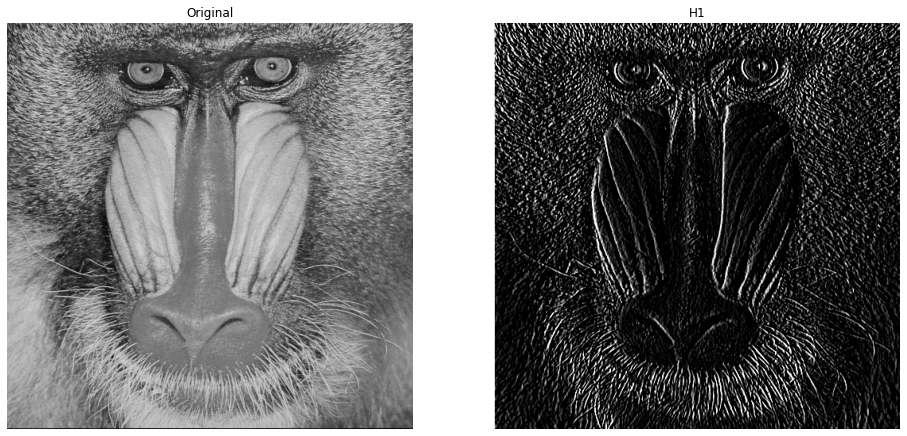

In [7]:
img_nome = 'baboon.png'
img_matriz = converteImagemMatriz(img_nome)
img = subMatrizes(img_matriz, h1.shape)
matriz_filtrada = aplicacaoFiltro(img, h1)
plotImagem(img_nome,'h1', matriz_filtrada)

True

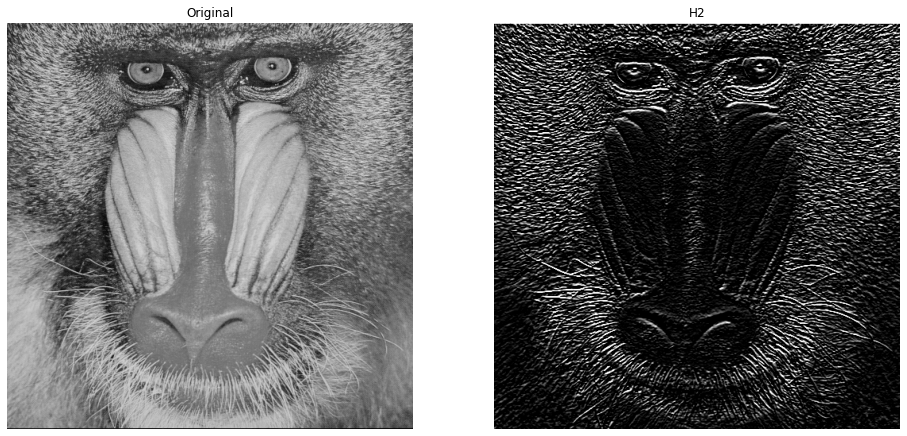

In [8]:
img_nome = 'baboon.png'
img_matriz = converteImagemMatriz(img_nome)
img = subMatrizes(img_matriz, h2.shape)
matriz_filtrada = aplicacaoFiltro(img, h2)
plotImagem(img_nome,'h2', matriz_filtrada)

True

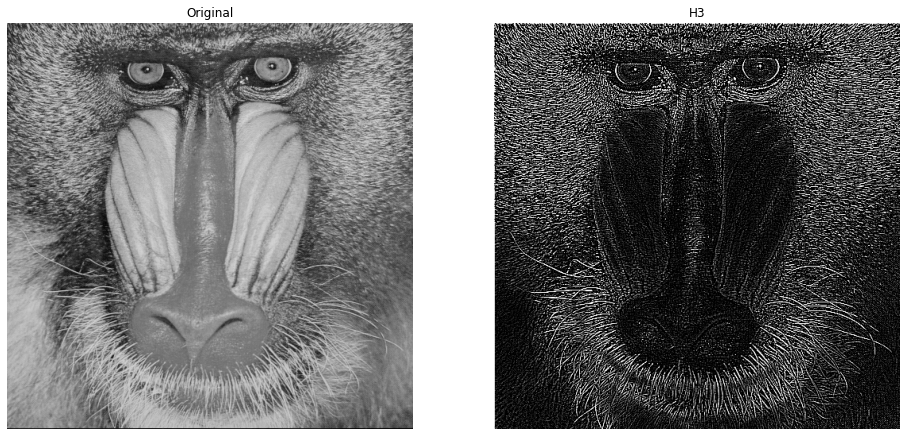

In [9]:
img_nome = 'baboon.png'
img_matriz = converteImagemMatriz(img_nome)
img = subMatrizes(img_matriz, h3.shape)
matriz_filtrada = aplicacaoFiltro(img, h3)
plotImagem(img_nome,'h3', matriz_filtrada)

True

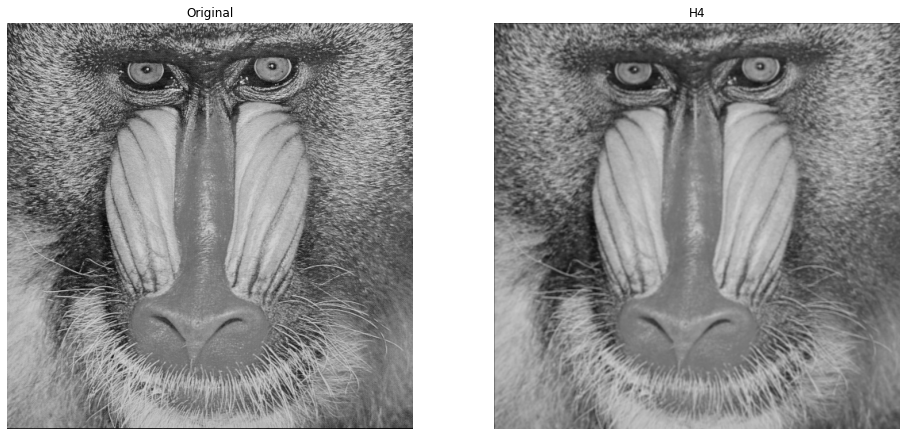

In [10]:
img_nome = 'baboon.png'
img_matriz = converteImagemMatriz(img_nome)
img = subMatrizes(img_matriz, h4.shape)
matriz_filtrada = aplicacaoFiltro(img, h4)
plotImagem(img_nome,'h4', matriz_filtrada)

True

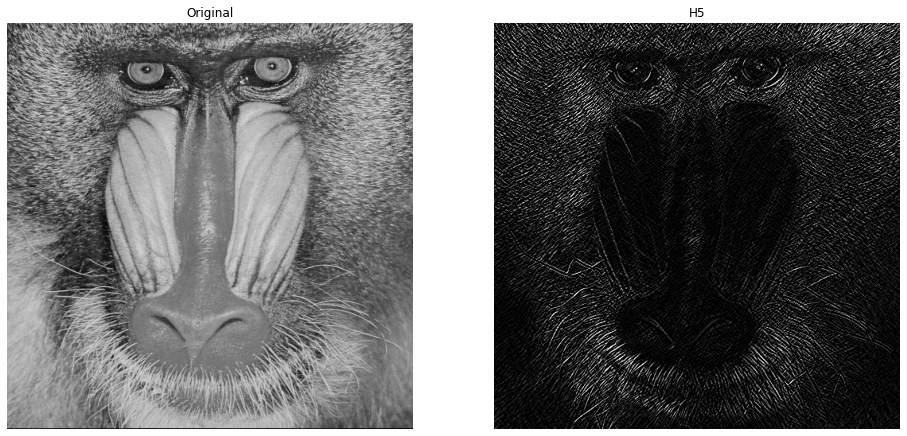

In [11]:
img_nome = 'baboon.png'
img_matriz = converteImagemMatriz(img_nome)
img = subMatrizes(img_matriz, h5.shape)
matriz_filtrada = aplicacaoFiltro(img, h5)
plotImagem(img_nome,'h5', matriz_filtrada)

True

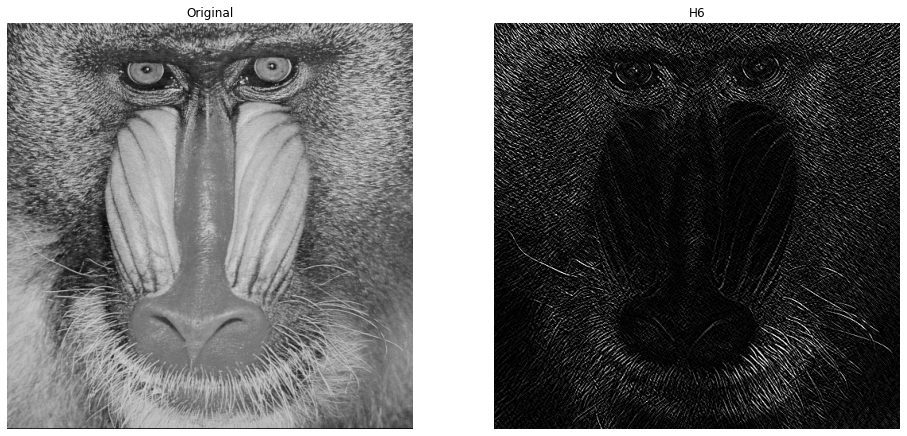

In [12]:
img_nome = 'baboon.png'
img_matriz = converteImagemMatriz(img_nome)
img = subMatrizes(img_matriz, h6.shape)
matriz_filtrada = aplicacaoFiltro(img, h6)
plotImagem(img_nome,'h6', matriz_filtrada)

True

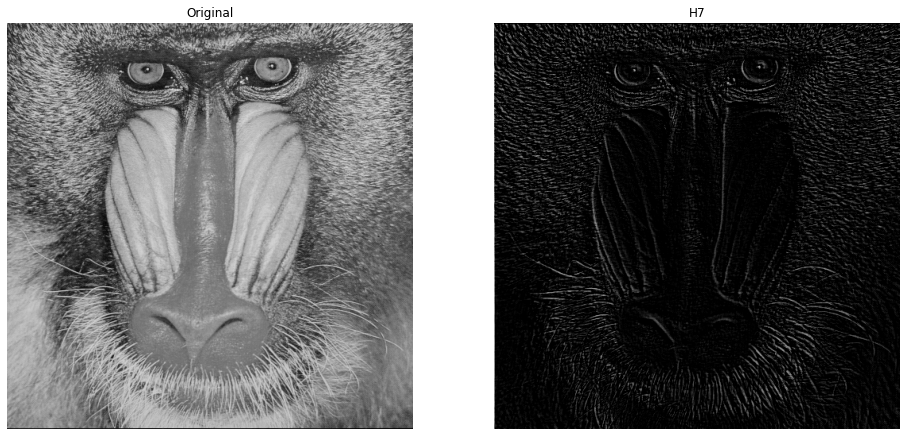

In [13]:
img_nome = 'baboon.png'
img_matriz = converteImagemMatriz(img_nome)
img = subMatrizes(img_matriz, h7.shape)
matriz_filtrada = aplicacaoFiltro(img, h7)
plotImagem(img_nome,'h7', matriz_filtrada)

True

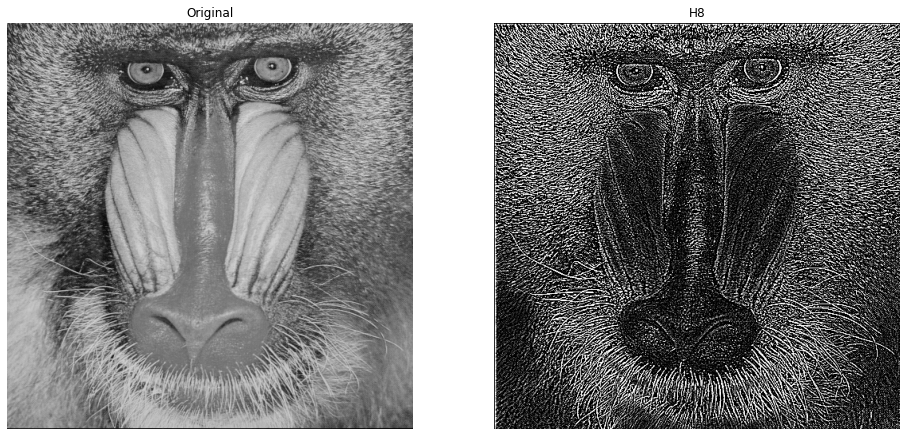

In [14]:
img_nome = 'baboon.png'
img_matriz = converteImagemMatriz(img_nome)
img = subMatrizes(img_matriz, h8.shape)
matriz_filtrada = aplicacaoFiltro(img, h8)
plotImagem(img_nome,'h8', matriz_filtrada)

True

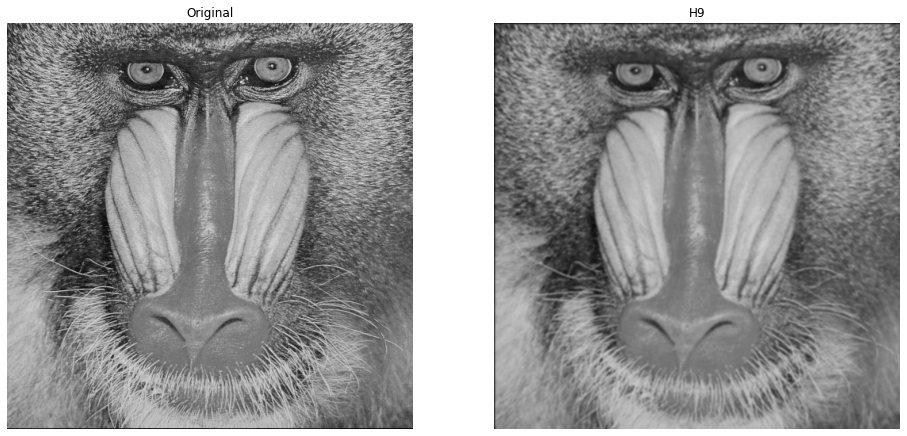

In [15]:
img_nome = 'baboon.png'
img_matriz = converteImagemMatriz(img_nome)
img = subMatrizes(img_matriz, h9.shape)
matriz_filtrada = aplicacaoFiltro(img, h9)
plotImagem(img_nome,'h9', matriz_filtrada)

True

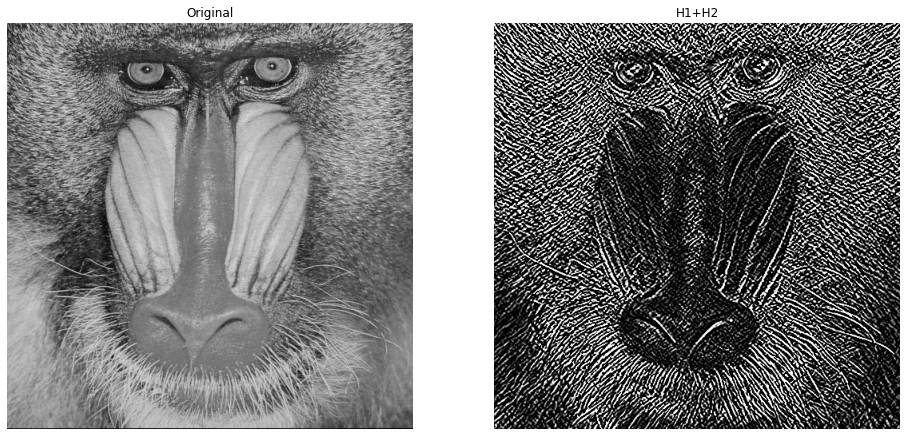

In [16]:
img_name = 'baboon.png'
img_matriz = converteImagemMatriz(img_nome)

img = subMatrizes(img_matriz, h1.shape)
matriz_filtrada = aplicacaoFiltro(img, h1)

img = subMatrizes(matriz_filtrada, h2.shape)
matriz_filtrada = aplicacaoFiltro(img, h2)

plotImagem(img_nome,'h1+h2', matriz_filtrada)